# TIME SERIES

## Objective

Here we have two data frame 
1. Train data
2. Test data

Where we have to predict **feature_2** of test data, with help of train data. So, to predict Feature_2 we will try Univariate Algorithms. Then Multivariate Algorithm.

- We will use Different Algorithms
  1. ARIMA
  2. SARIMA
  3. VAR

- Then, some Regression

  1. LINEAR REGRESSION
  2. RIDGE REGRESSION
  3. LASSO REGRESSION

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# for visualisation
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

###  Loading Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("shape of train data", train.shape)
train.head()

shape of train data (564, 4)


,id,time,feature_1,feature_2
0,0,2019-03-19 00:00:00,735.740043,54479.540513
1,1,2019-03-19 00:00:10,734.102947,47888.033714
2,2,2019-03-19 00:00:20,730.060336,47700.882325
3,3,2019-03-19 00:00:30,725.609742,47790.094648
4,4,2019-03-19 00:00:40,724.328480,47808.402381


In [4]:
train.tail()

,id,time,feature_1,feature_2
559,559,2019-03-19 01:33:10,423.726707,54115.388787
560,560,2019-03-19 01:33:20,424.278568,54127.830664
561,561,2019-03-19 01:33:30,420.127639,54092.561194
562,562,2019-03-19 01:33:40,421.291993,53994.714950
563,563,2019-03-19 01:33:50,423.257581,53863.615475


In [158]:
print("shape of the test data", test.shape)
test.head()

shape of the test data (375, 3)


,id,time,feature_1
0,564,2019-03-19 01:34:00,423.064004
1,565,2019-03-19 01:34:10,423.342749
2,566,2019-03-19 01:34:20,423.181186
3,567,2019-03-19 01:34:30,421.275243
4,568,2019-03-19 01:34:40,422.208444


In [5]:
# copy the data into another variable

train1 = train.copy()
test1 = test.copy()

In [6]:
# convert the date into pandas date format

train1["time"] = pd.to_datetime(train1["time"])
test1["time"] = pd.to_datetime(test1["time"])

In [7]:
# setting time as index 

train_n = train1.set_index(["time"])
test_n  = test1.set_index(["time"])

In [8]:
# for univariate analysis we seperate feature 1 and 2

f1_with_time = train_n[["feature_1"]]
f1_with_time.head()



,feature_1
time,
2019-03-19 00:00:00,735.740043
2019-03-19 00:00:10,734.102947
2019-03-19 00:00:20,730.060336
2019-03-19 00:00:30,725.609742
2019-03-19 00:00:40,724.328480


In [9]:
f2_with_time = train_n[["feature_2"]]
f2_with_time.head()

,feature_2
time,
2019-03-19 00:00:00,54479.540513
2019-03-19 00:00:10,47888.033714
2019-03-19 00:00:20,47700.882325
2019-03-19 00:00:30,47790.094648
2019-03-19 00:00:40,47808.402381


### Visualising the data

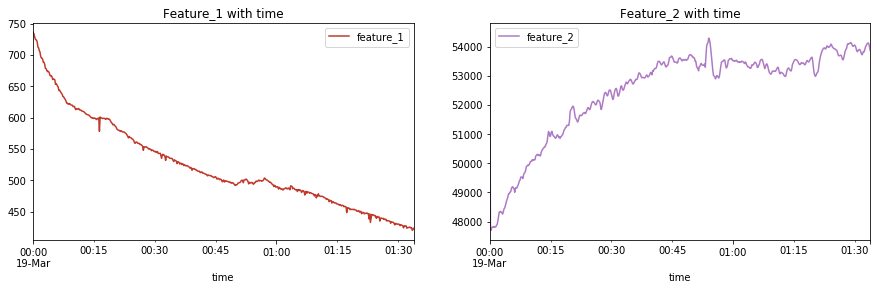

In [586]:
# plotting both the series with time independently

f, ax = plt.subplots(1,2 , figsize = (15,4)) 
train1.plot(x  = "time" ,  y = "feature_1", ax= ax[0], color = "#C0392B", title = "Feature_1 with time")
train1.plot(x  = "time" ,  y = "feature_2", ax= ax[1], color = "#AF7AC5", title = "Feature_2 with time")



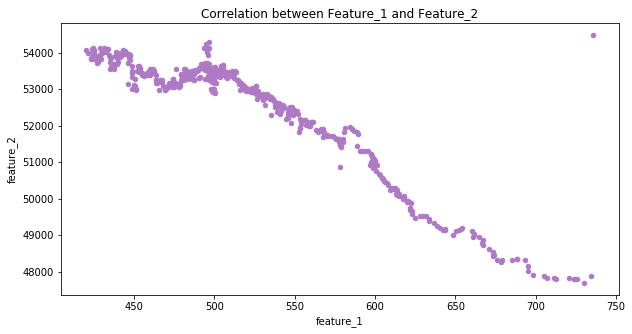

In [590]:
# plot both features together with time

train_n.plot(kind = 'scatter', x = 'feature_1', y = "feature_2", figsize = (10,5), color = "#AF7AC5",title = "Correlation between Feature_1 and Feature_2")


### Decomposition

In [28]:
#decompoition of the time series

from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 10,5

from statsmodels.tsa.seasonal import seasonal_decompose


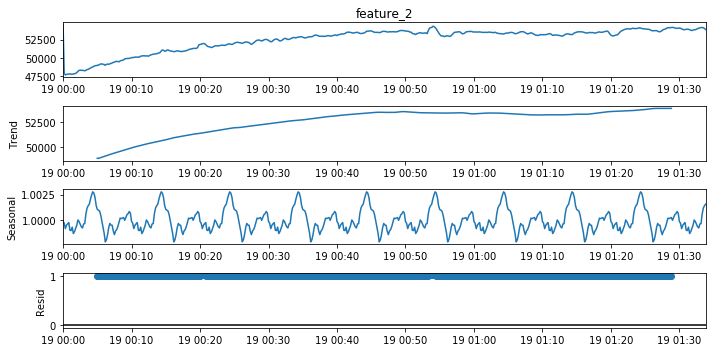

In [30]:
# since series is exponential tried multiplicative model

decomposed_series = seasonal_decompose(f2_with_time["feature_2"],model = "multiplicative", period = 60)
figure  =  decomposed_series.plot()
plt.show()

### Methods to check STATIONARITY

Time series to be Stationary, series having 

1. Mean should be constant.
2. Variance should be constant.
3. there should not be Auto-Correlation.


First 2 points tested by Rolling- Statistic. And last point tested by ADF(**Augmented Dickey Fuller Test**)

#### 1. Rolling mean statistics

In [11]:
# Determine rolling statistics
def rolling_stat(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()    #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd  =  time_series.rolling(window = 12).std()

    #Plot rolling statistics
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

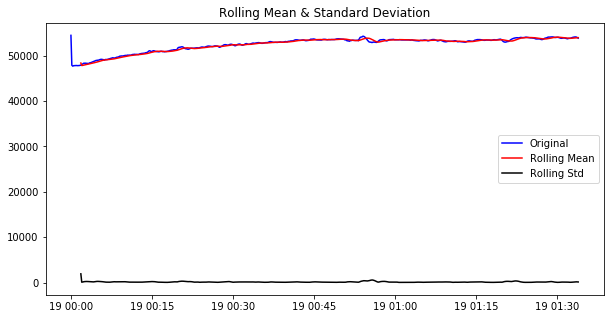

In [12]:
rolling_stat(f2_with_time)

Here rolling mean is not constant changing with time. There is also some variation in rolling std. Also check with ADF test.

#### 2. ADF Test

In [20]:
#Perform Augmented Dickey–Fuller test:
def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['feature_2'], autolag = 'AIC')

    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [34]:
adf_test(f2_with_time)

Results of Dickey Fuller Test:
Test Statistic                  -5.464021
p-value                          0.000002
#Lags Used                      19.000000
Number of Observations Used    544.000000
Critical Value (1%)             -3.442428
Critical Value (5%)             -2.866868
Critical Value (10%)            -2.569607
dtype: float64


Here **Test Statistics** is less than the **Critical Value**. That we want but there is some variation in rolling statistics mean. So more transformation can be tried.

#### Data Spliting

In [14]:
train_ds = f2_with_time.iloc[:500, :]
valid_ds = f2_with_time.iloc[500:564, :]

In [15]:
print("Shape of training set :" , train_ds.shape)
print("Shape of valid set : ", valid_ds.shape)

Shape of training set : (500, 1)
Shape of valid set :  (64, 1)


In [26]:
len(train_ds)

500

### Transformation to get Stationary Time Series

we can transform time series by taking **log**, **Square root**,**Squaring**, **Cube**,**Cube root**,by **time shifting** or using many more transformations.

Start with taking log.

#### 1. Log Transformation 

In [16]:
f2_log = np.log(f2_with_time)
f2_log.head()

,feature_2
time,
2019-03-19 00:00:00,10.905581
2019-03-19 00:00:10,10.776621
2019-03-19 00:00:20,10.772705
2019-03-19 00:00:30,10.774574
2019-03-19 00:00:40,10.774957


In [105]:
f2_log.tail()

,feature_2
time,
2019-03-19 01:33:10,10.898874
2019-03-19 01:33:20,10.899104
2019-03-19 01:33:30,10.898452
2019-03-19 01:33:40,10.896641
2019-03-19 01:33:50,10.894210


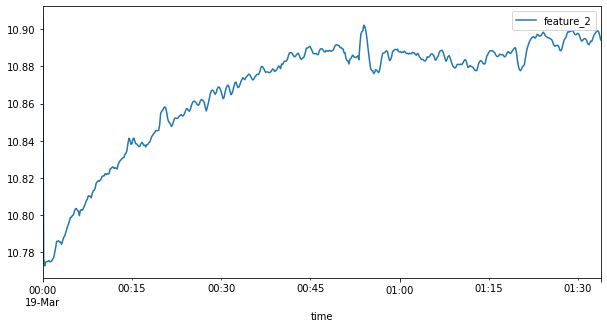

In [17]:
f2_log.plot()

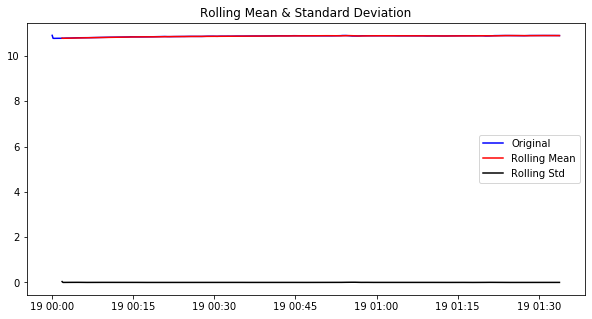

In [18]:
rolling_stat(f2_log)

In [21]:
adf_test(f2_log)

Results of Dickey Fuller Test:
Test Statistic                -5.664120e+00
p-value                        9.235365e-07
#Lags Used                     1.900000e+01
Number of Observations Used    5.440000e+02
Critical Value (1%)           -3.442428e+00
Critical Value (5%)           -2.866868e+00
Critical Value (10%)          -2.569607e+00
dtype: float64


#### 2. TIme Shifting

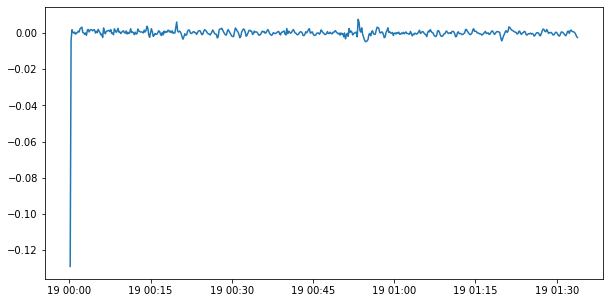

In [22]:
# tried time shifting 

f2_log_shift  =  f2_log - f2_log.shift()
plt.plot(f2_log_shift)
f2_log_shift.dropna(inplace = True)

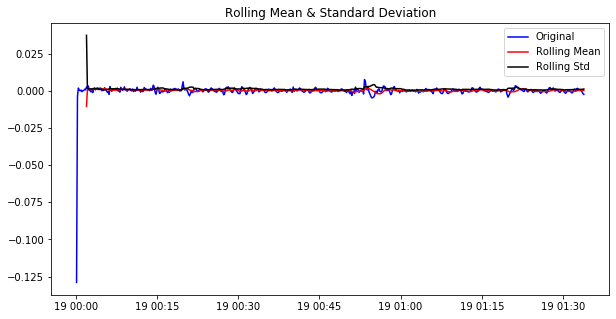

In [23]:
rolling_stat(f2_log_shift)

In [45]:
adf_test(f2_log_shift)

Results of Dickey Fuller Test:
Test Statistic                -1.304047e+01
p-value                        2.246740e-24
#Lags Used                     1.000000e+00
Number of Observations Used    5.610000e+02
Critical Value (1%)           -3.442060e+00
Critical Value (5%)           -2.866706e+00
Critical Value (10%)          -2.569521e+00
dtype: float64


#### Ploting ACF and PACF

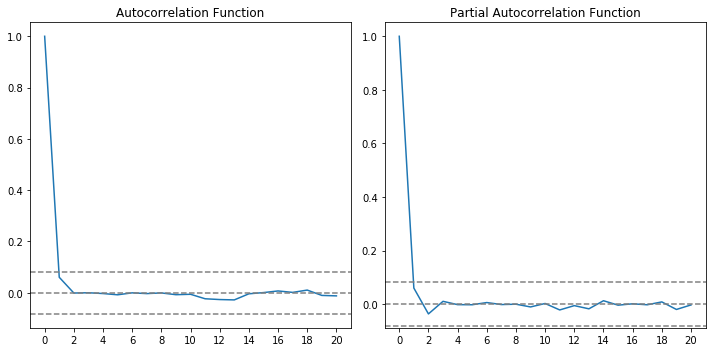

In [46]:
#ACF & PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf  =  acf(f2_log_shift, nlags = 20)
lag_pacf  =  pacf(f2_log_shift, nlags = 20, method = 'ols')


rcParams['figure.figsize']  =  10, 5
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(f2_log_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(f2_log_shift)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(f2_log_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(f2_log_shift)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

Tried to Plot using **Plot_acf , plot_pacf**

In [195]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

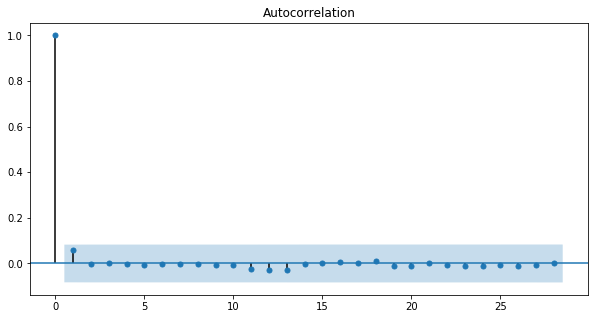

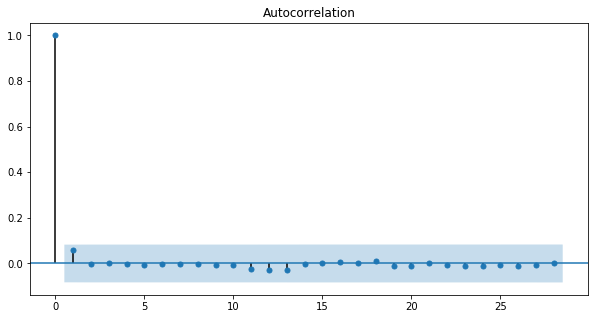

In [199]:
plot_acf(f2_log_shift)

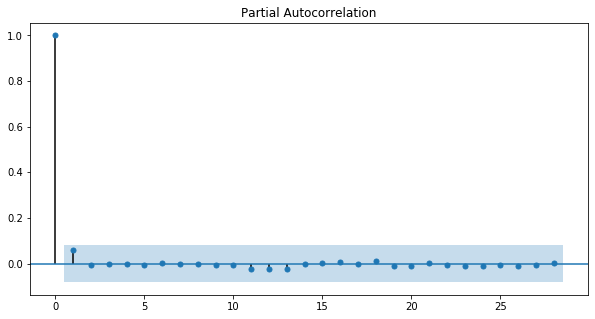

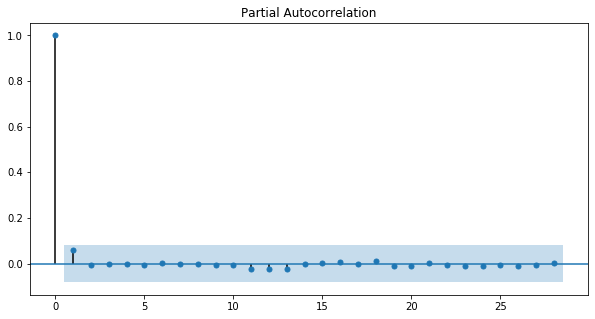

In [200]:
plot_pacf(f2_log_shift)

Both ACF And PACF values are 2.
so, p = 2
    q = 2

### Building Models

### 1. ARIMA Model - Autoregressive Integreted Moving Averages

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(f2_log_shift.iloc[:500,:], order = (6,0,2))
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# #ARIMA(2,0,2) = ARMA (2,2)

Lag: 6
Coefficients: const              0.000105
ar.L1.feature_2    1.497924
ar.L2.feature_2   -0.015714
ar.L3.feature_2   -1.251473
ar.L4.feature_2    1.007574
ar.L5.feature_2   -0.283786
ar.L6.feature_2   -0.030780
ma.L1.feature_2    0.001564
ma.L2.feature_2   -0.998436
dtype: float64


In [46]:
# prrdicting for validtating set

valid_pred = model_fit.predict(start = len(train_ds), end = len(train_ds)+ len(valid_ds)-2)

In [49]:
pred_ARIMA_diff = pd.Series(valid_pred, copy=True)
pred_ARIMA_diff.head()

2019-03-19 01:23:30   -0.001176
2019-03-19 01:23:40   -0.001182
2019-03-19 01:23:50   -0.000586
2019-03-19 01:24:00    0.000027
2019-03-19 01:24:10    0.000391
Freq: 10S, dtype: float64

In [50]:
# calculating cumalative sum

pred_ARIMA_cumsum = pred_ARIMA_diff.cumsum()
pred_ARIMA_cumsum.head()

2019-03-19 01:23:30   -0.001176
2019-03-19 01:23:40   -0.002358
2019-03-19 01:23:50   -0.002944
2019-03-19 01:24:00   -0.002917
2019-03-19 01:24:10   -0.002526
Freq: 10S, dtype: float64

In [51]:
#Transforming into log values

pred_ARIMA_log = pd.Series(f2_log['feature_2'].iloc[500:], index=valid_ds.index)
predictions_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2019-03-19 01:23:20    10.896957
2019-03-19 01:23:30    10.895064
2019-03-19 01:23:40    10.894025
2019-03-19 01:23:50    10.893700
2019-03-19 01:24:00    10.894658
dtype: float64

In [52]:
# log values are tranformed into normal values

reverted_back_prediction = pd.DataFrame(np.exp(predictions_ARIMA_log))
reverted_back_prediction.head()

# all transforormation in reverse order.

,0
2019-03-19 01:23:20,54011.760484
2019-03-19 01:23:30,53909.612404
2019-03-19 01:23:40,53853.647686
2019-03-19 01:23:50,53836.137774
2019-03-19 01:24:00,53887.714339


##### Visualisation of predicted and Actual time series

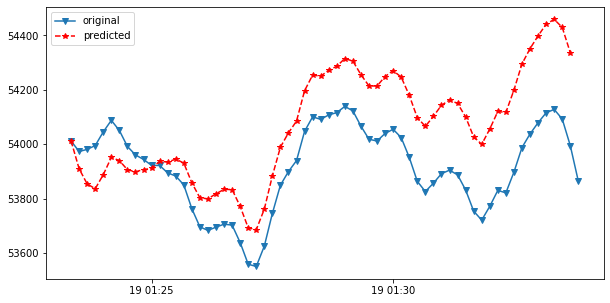

In [607]:

from matplotlib import pyplot
pyplot.plot(f2_with_time.iloc[500:], label = "original", marker = "v" )
pyplot.plot(reverted_back_prediction[:63], color='red',linestyle = "dashed", label = "predicted",marker = "*" )
pyplot.legend()
pyplot.show()

#### Error Calculation

In [55]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(f2_with_time.iloc[500:563], reverted_back_prediction[:63])
print(' MSE: %.3f' % error)

print("RMSE : %.3f" % np.sqrt(error))

 MSE: 40330.052
RMSE : 200.823


So, here rmse is 200, which is better than AR and MA model. But this value is also not so good, so try for another Model.

### 2. SARIMA Model

In [305]:
# here a new component is included which is seasonality, since here time difference 10s so, i took 10.

import statsmodels.api as sm
model_s = sm.tsa.statespace.SARIMAX(f2_log_shift.iloc[:500,:], order = (6,0,6), seasonal_oredr = (6,0,6,10))
model_s_fit = model_s.fit()

In [307]:
# predicting for validation set

valid_s_pred = model_s_fit.predict(start = len(train_ds), end = len(train_ds)+ len(valid_ds)-2)

In [311]:
# calculating for cumalative sum

pred_SARIMA_diff = pd.Series(valid_s_pred, copy=True)
pred_SARIMA_cumsum = pred_SARIMA_diff.cumsum()
pred_SARIMA_cumsum.head()

2019-03-19 01:23:30   -0.000335
2019-03-19 01:23:40   -0.000498
2019-03-19 01:23:50   -0.000537
2019-03-19 01:24:00   -0.000530
2019-03-19 01:24:10   -0.000580
Freq: 10S, dtype: float64

In [312]:
# log transformation

pred_SARIMA_log1 = pd.Series(f2_log['feature_2'].iloc[500:], index=valid_ds.index)
predictions_SARIMA_log1 = pred_SARIMA_log1.add(pred_SARIMA_cumsum,fill_value=0)
predictions_SARIMA_log1.head()

2019-03-19 01:23:20    10.896957
2019-03-19 01:23:30    10.895905
2019-03-19 01:23:40    10.895886
2019-03-19 01:23:50    10.896107
2019-03-19 01:24:00    10.897045
dtype: float64

In [313]:
# reverted back from log to normal vales

reverted_back_pred_S = pd.DataFrame(np.exp(predictions_SARIMA_log))
reverted_back_pred_S.head()


,0
2019-03-19 01:23:20,54011.760484
2019-03-19 01:23:30,53964.067300
2019-03-19 01:23:40,53969.162204
2019-03-19 01:23:50,53982.172055
2019-03-19 01:24:00,54038.208009


##### Visualising predicted versus Actual 

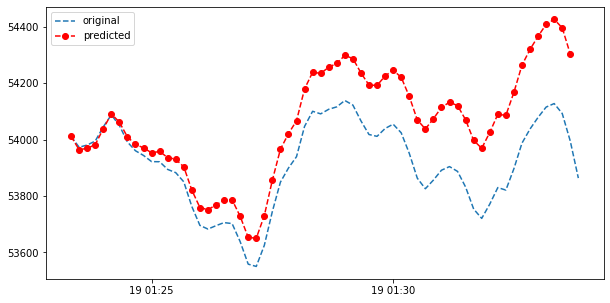

In [601]:
from matplotlib import pyplot
pyplot.plot(f2_with_time.iloc[500:], linestyle = "dashed", label = "original" )
pyplot.plot(reverted_back_pred_S[:63], color='red',marker = "o", label = "predicted",linestyle = "dashed")
pyplot.legend()
pyplot.show()

#### Calculating RMSE

In [330]:

error2 = mean_squared_error(f2_with_time.iloc[500:563], reverted_back_pred_S[:63])
print(' MSE: %.3f' % error2)

print("RMSE : %.3f" % np.sqrt(error2))

 MSE: 29884.192
RMSE : 172.870


RMSE going down from 200(ARIMA) to 172 (SARIMA). Trying for MULTIVARIATE Timeseries

### 3. VAR 

In [582]:
# dropping id column

v_ds = train_n.drop("id", axis =1)

In [225]:
# spliting into train and valid sets

v_train1 = v_ds.iloc[:500,:]
v_valid  = v_ds.iloc[500:,:]

In [217]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VARMAX
from statsmodels.tools.eval_measures import rmse, aic

In [264]:
# fitting values into model

v_model1 = VARMAX(v_train1,order=(0,1),trend='c')
v_result1 = v_model1.fit(maxiter = 100, disp = False)

In [269]:
# predcting values for validation set and test set

v_pred = v_result1.predict(satrt = 0, end = 940)
v_pred.tail()

,feature_1,feature_2
2019-03-19 02:36:00,535.027738,52304.736359
2019-03-19 02:36:10,535.027738,52304.736359
2019-03-19 02:36:20,535.027738,52304.736359
2019-03-19 02:36:30,535.027738,52304.736359
2019-03-19 02:36:40,535.027738,52304.736359


##### Visualising Actual and Predicted Feature_2

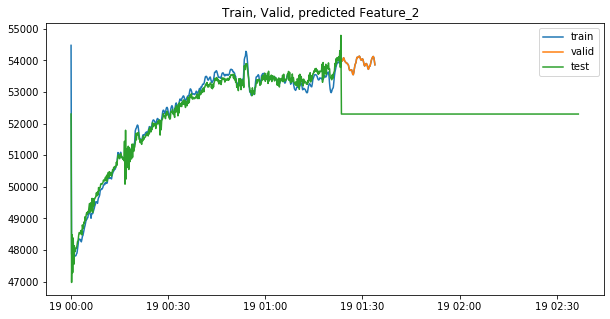

In [615]:


pyplot.plot(v_train["feature_2"], label = "train" )
pyplot.plot(v_valid["feature_2"], label = "valid" )
pyplot.plot(v_pred["feature_2"], label = "test" )
pyplot.title("Train, Valid, predicted Feature_2  ")
pyplot.legend()

Text(0.5, 1.0, 'Train, Valid, Predicted Feature_1')

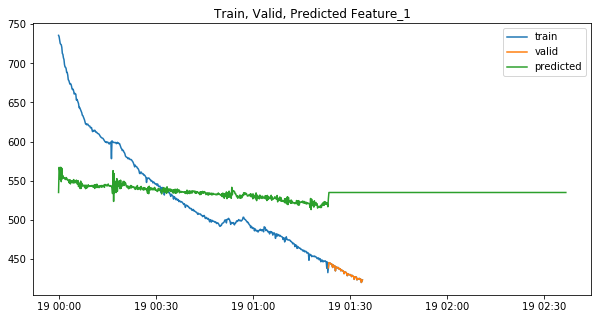

In [616]:
pyplot.plot(v_train["feature_1"], label = "train")
pyplot.plot(v_valid["feature_1"],label = "valid")
pyplot.plot(v_pred["feature_1"], label = "predicted")
pyplot.legend()
pyplot.title("Train, Valid, Predicted Feature_1")

In [271]:
v_val_pred = v_pred[500:564]

#### Error Calculation

In [273]:
error4 = mean_squared_error(v_valid["feature_2"], v_val_pred["feature_2"])
print(' MSE: %.3f' % error4)

print("RMSE : %.3f" % np.sqrt(error4))

 MSE: 2581952.339
RMSE : 1606.845


Here error goes very high from172 to 1606

### 4. Linear Regression

Tried the Time Series Preoblem with Linear Regression 

In [9]:
train.head()

,id,time,feature_1,feature_2
0,0,2019-03-19 00:00:00,735.740043,54479.540513
1,1,2019-03-19 00:00:10,734.102947,47888.033714
2,2,2019-03-19 00:00:20,730.060336,47700.882325
3,3,2019-03-19 00:00:30,725.609742,47790.094648
4,4,2019-03-19 00:00:40,724.328480,47808.402381


In [5]:
lin = train.copy()

In [15]:
lin['time'] = pd.to_datetime(lin['time'], errors='coerce')

lin["sec"] = lin["time"].dt.second
lin["minute"] = lin["time"].dt.minute
lin["hour"]   = lin["time"].dt.hour

In [17]:
#lin = train.drop("id", axis =1)
lin_m = lin.drop("time", axis =1)
lin.head()

,time,feature_1,feature_2,sec,minute,hour
0,2019-03-19 00:00:00,735.740043,54479.540513,0,0,0
1,2019-03-19 00:00:10,734.102947,47888.033714,10,0,0
2,2019-03-19 00:00:20,730.060336,47700.882325,20,0,0
3,2019-03-19 00:00:30,725.609742,47790.094648,30,0,0
4,2019-03-19 00:00:40,724.328480,47808.402381,40,0,0


In [18]:
lin_m.head(10)

,feature_1,feature_2,sec,minute,hour
0,735.740043,54479.540513,0,0,0
1,734.102947,47888.033714,10,0,0
2,730.060336,47700.882325,20,0,0
3,725.609742,47790.094648,30,0,0
4,724.328480,47808.402381,40,0,0
5,723.715893,47810.517411,50,0,0
6,720.406875,47835.758121,0,1,0
7,712.682269,47806.938481,10,1,0
8,711.509741,47812.099044,20,1,0
9,707.025594,47821.540514,30,1,0


In [19]:
# SPliting into inependent and dependent variable

ind = lin_m[["feature_1","sec","minute","hour"]]
dep = lin_m["feature_2"]

In [20]:
print("shape of independent variable", ind.shape)
print("shape of dependent variable ",dep.shape)

shape of independent variable (564, 4)
shape of dependent variable  (564,)


In [21]:
# Scaling Values

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(ind)
data1 = scaler.transform(ind) 

In [22]:
data = pd.DataFrame(data1, columns =["feature_1","seconds","minutes","hours"])

In [23]:
data.head()

,feature_1,seconds,minutes,hours
0,3.009236,-1.46385,-1.522552,-0.752773
1,2.985997,-0.87831,-1.522552,-0.752773
2,2.928610,-0.29277,-1.522552,-0.752773
3,2.865431,0.29277,-1.522552,-0.752773
4,2.847243,0.87831,-1.522552,-0.752773


In [24]:
data.shape

(564, 4)

In [25]:
x = data
y = lin_m["feature_2"]

In [26]:
# Spliting into train and test data

x_train = x.iloc[:500,:]
x_test  = x.iloc[500:564,:]
y_train = y.iloc[:500]
y_test  = y.iloc[500:]

In [27]:
y_train.shape

(500,)

In [28]:
x_test.shape

(64, 4)

In [29]:
y_test.shape

(64,)

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
linreg1 = LinearRegression()          # creating Object
linreg1.fit(x_train, y_train)         #  FIt the data
y_pred1 = linreg1.predict(x_test)     # predicting

# error calculation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_pred1,y_test))
rmse

430.489591594876

### 5. RIdge and Lasso Regression

#### 5.1  Ridge Regression

-   It adds penalty (lambda) to all variables excluding intercept.
-   It penalise all the variable and higher penalty add to important terms so that model can bring to less important terms.
-   In L2(**Ridge**) regression it adds squared magnitude of coefficient.

In [33]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha = 0.7, normalize = True)
ridgereg.fit(x_train,y_train)
y_pred2 = ridgereg.predict(x_test)

In [34]:
rmse2 = np.sqrt(mean_squared_error(y_pred2, y_test))
rmse2

196.19568059488347

In [43]:
test_df  = pd.DataFrame(y_test)
test_df["pred_f2"] = y_pred2
test_df.head()

,feature_2,pred_f2
500,54011.760484,53699.732524
501,53973.039326,53626.456108
502,53980.802179,53629.144396
503,53994.857272,53625.306399
504,54045.146298,53671.639326


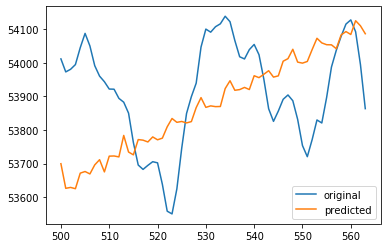

In [48]:
from matplotlib import pyplot
pyplot.plot(test_df["feature_2"], Label = "original")
pyplot.plot(test_df["pred_f2"], Label = "predicted")


pyplot.legend()

#### 5.2 Lasso Regression

- **Lasso** Stands for  **Least absolute shrinkage and selection operator.**
- It shrinks the less imp features. So it is important for feature selection
- L1(**Lasso**) adds absolute value of magnitude of coef. 

In [49]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha = 0.001, normalize = True)
lassoreg.fit(x_train,y_train)
y_pred3 = lassoreg.predict(x_test)
rmse3 = np.sqrt(mean_squared_error(y_pred3, y_test))
rmse3

430.85410357366123

In [50]:
test_dfl  = pd.DataFrame(y_test)
test_dfl["pred_f2"] = y_pred3
test_dfl.head()

,feature_2,pred_f2
500,54011.760484,54175.516470
501,53973.039326,53973.641284
502,53980.802179,53974.741758
503,53994.857272,53958.404172
504,54045.146298,54043.368447


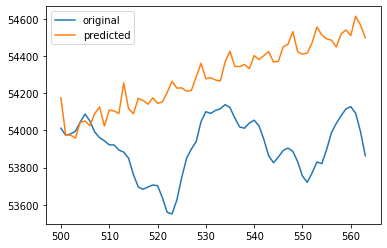

In [51]:
#from matplotlib import pyplot
pyplot.plot(test_dfl["feature_2"], Label = "original")
pyplot.plot(test_dfl["pred_f2"], Label = "predicted")


pyplot.legend()